In [1]:
pip install MDAnalysis

Defaulting to user installation because normal site-packages is not writeable
You should consider upgrading via the '/share/apps/python/3.8.6/intel/bin/python -m pip install --upgrade pip' command.
Note: you may need to restart the kernel to use updated packages.


/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float64'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:500: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  setattr(self, word, getattr(machar, word).flat[0])
/home/ac7407/.local/lib/python3.8/site-packages/numpy/core/getlimits.py:89: UserWarning: The value of the smallest subnormal for <class 'numpy.float32'> type is zero.
  return self._float_to_str(self.smallest_subnormal)
/home/ac7407/.local/lib/python3.8/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Mass

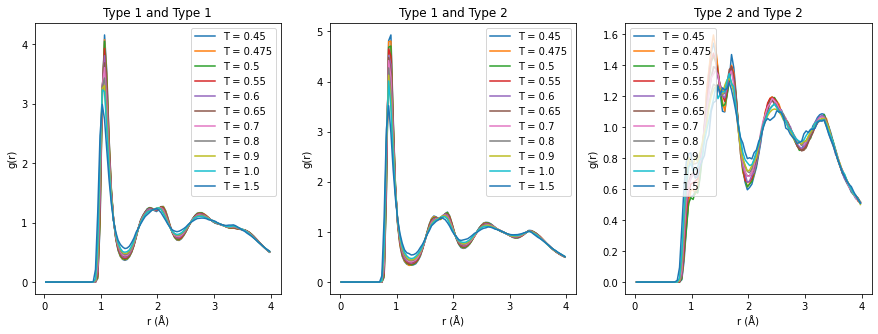

In [2]:
# import libraries
import numpy as np
import MDAnalysis as mda
import MDAnalysis.analysis.rdf as rdf
import MDAnalysis.analysis.msd as msd
import matplotlib.pyplot as plt

# load LAMMPS trajectory for temperatures 0.45, 0.475, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8, 0.9, 1.0, 1.5
u045 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T0.45_n360_v300_100000000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.45_n360_v300_prod_100000000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
u0475 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T0.475_n360_v300_30000000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
u05 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T0.5_n360_v300_10000000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
u055 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T0.55_n360_v300_3000000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
u06 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T0.6_n360_v300_1000000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
u065 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T0.65_n360_v300_350000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
u07 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T0.7_n360_v300_180000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
u08 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T0.8_n360_v300_150000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
u09 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T0.9_n360_v300_150000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
u10 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T1_n360_v300_50000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T1_n360_v300_prod_50000_1.unwrap.dcd', topology_format="LAMMPSDUMP")
u15 = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T1.5_n360_v300_10000_1.lammpstrj', '/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd', topology_format="LAMMPSDUMP")

# define list of temperatures
temp_list = [0.45, 0.475, 0.5, 0.55, 0.6, 0.65, 0.7, 0.8, 0.9, 1.0, 1.5]

# define list of trajectories
traj_list = [u045, u0475, u05, u055, u06, u065, u07, u08, u09, u10, u15]

# create empty list to store RDFs
rdfs = np.empty((3, len(traj_list)), dtype=object)

# compute RDFs for each trajectory
# type 1 and type 1, type 1 and type 2, type 2 and type 2 
for traj in traj_list:

    # define selection of particle type
    sel1 = traj.select_atoms("type 1")
    sel2 = traj.select_atoms("type 2")

    # compute RDF 
    rdfs[0, traj_list.index(traj)] = rdf.InterRDF(sel1, sel1, nbins=100, range=(0.01, 4.0))
    rdfs[1, traj_list.index(traj)] = rdf.InterRDF(sel1, sel2, nbins=100, range=(0.0, 4.0))
    rdfs[2, traj_list.index(traj)] = rdf.InterRDF(sel2, sel2, nbins=100, range=(0.01, 4.0))

    # run RDF analysis
    rdfs[0, traj_list.index(traj)].run()
    rdfs[1, traj_list.index(traj)].run()
    rdfs[2, traj_list.index(traj)].run()

# plot RDFs
fig, ax = plt.subplots(1, 3, figsize=(15, 5))

# plot RDFs for type 1 and type 1
for i in range(len(traj_list)):
    ax[0].plot(rdfs[0, i].bins, rdfs[0, i].rdf, label=f"T = {temp_list[i]}")
ax[0].set_xlabel("r (Å)")
ax[0].set_ylabel("g(r)")
ax[0].set_title("Type 1 and Type 1")
ax[0].legend()

# plot RDFs for type 1 and type 2
for i in range(len(traj_list)):
    ax[1].plot(rdfs[1, i].bins, rdfs[1, i].rdf, label=f"T = {temp_list[i]}")
ax[1].set_xlabel("r (Å)")
ax[1].set_ylabel("g(r)")
ax[1].set_title("Type 1 and Type 2")
ax[1].legend()

# plot RDFs for type 2 and type 2
for i in range(len(traj_list)):
    ax[2].plot(rdfs[2, i].bins, rdfs[2, i].rdf, label=f"T = {temp_list[i]}")
ax[2].set_xlabel("r (Å)")
ax[2].set_ylabel("g(r)")
ax[2].set_title("Type 2 and Type 2")
ax[2].legend()

plt.show()


/home/ac7407/.local/lib/python3.8/site-packages/MDAnalysis/topology/LAMMPSParser.py:631: UserWarning: Guessed all Masses to 1.0
  warnings.warn('Guessed all Masses to 1.0')


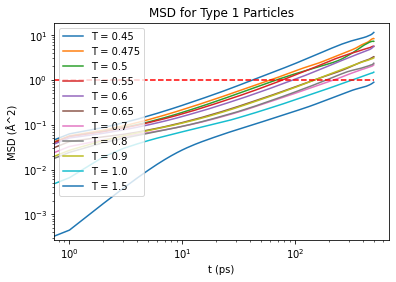

In [3]:
# create list of trajectory files
traj_files = [
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.45_n360_v300_prod_100000000_1.unwrap.dcd', 
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.475_n360_v300_prod_30000000_1.unwrap.dcd',
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.5_n360_v300_prod_10000000_1.unwrap.dcd',
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.55_n360_v300_prod_3000000_1.unwrap.dcd',
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.6_n360_v300_prod_1000000_1.unwrap.dcd',
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.65_n360_v300_prod_350000_1.unwrap.dcd',
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.7_n360_v300_prod_180000_1.unwrap.dcd',
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.8_n360_v300_prod_150000_1.unwrap.dcd',
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T0.9_n360_v300_prod_150000_1.unwrap.dcd',
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T1_n360_v300_prod_50000_1.unwrap.dcd',
'/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/prod/kalj_T1.5_n360_v300_prod_10000_1.unwrap.dcd'
]

# create list of MSDs
msds = []

# use MDAnalysis to calculate MSDs for type 1 particles
for traj in traj_files:
    u = mda.Universe('/scratch/work/courses/CHEM-GA-2671-2022fa/ac7407/comp-class/comp-lab-class/Week9/data/equil/kalj_T0.45_n360_v300_100000000_1.lammpstrj', traj, topology_format='LAMMPSDUMP')
    
    MSD = msd.EinsteinMSD(u, select='type 1', msd_type='xyz', fft=True) 
    MSD.run()
    
    nframes = MSD.n_frames
    
    msds.append(MSD.results.timeseries)

# plot MSDs for type 1 particles
for i, msd in enumerate(msds):
    plt.loglog(msd, label=f"T = {temp_list[i]}")
plt.xlabel("t (ps)")
plt.ylabel("MSD (Å^2)")
plt.title("MSD for Type 1 Particles")
plt.legend()

# plot y = 1
plt.plot(np.linspace(0,500), np.ones(50), 'r--')
plt.show()

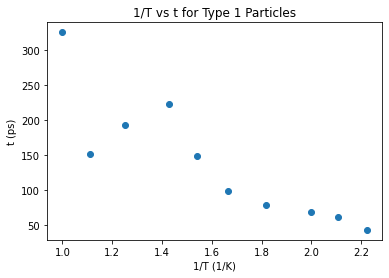

In [5]:
# create list of when MSD = 1
msd_1 = []
times = []

# calculate when MSD = 1 for type 1 particles
for i, msd in enumerate(msds):
    for j, val in enumerate(msd):
        if val > 1:
            msd_1.append(temp_list[i])
            times.append(j)
            break

# 1/T plot of when MSD = 1 for type 1 particles 
plt.plot(1/np.array(msd_1), times, 'o')
plt.xlabel("1/T (1/K)")
plt.ylabel("t (ps)")
plt.title("1/T vs t for Type 1 Particles")
plt.show()


